# 『ウェブ最適化ではじめる機械学習』の写経

In [1]:
import os
import sys

sys.path.append(os.path.join('../.venv/Lib/site-packages/'))

## Chap.1 A/B testing

### クリック率の推定

In [2]:
import numpy as np

In [3]:
thetas = np.linspace(0,1,1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [4]:
likelihood = lambda r : thetas if r else (1 - thetas)

In [5]:
def posterior(r, prior):
    lp = likelihood(r) * prior
    return lp / lp.sum()

In [6]:
# 一様分布で初期化
p = np.array([1 / len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [7]:
p = posterior(1,p) # クリック
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


In [8]:
from matplotlib import pyplot as plt

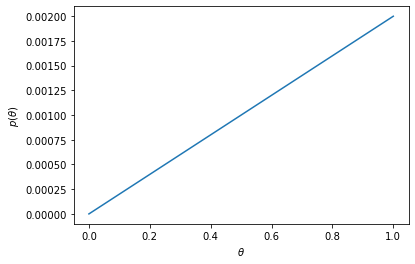

In [9]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [10]:
clicks = 2
noclicks = 38

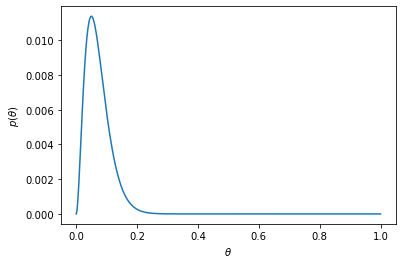

In [11]:
p = np.array([1 / len(thetas) for theta in thetas])
for _ in range(clicks):
    p = posterior(1,p)
for _ in range(noclicks):
    p = posterior(0, p)
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

### 統計モデリング

In [12]:
likelihood = lambda a, N: thetas ** a * (1- thetas) ** (N-a)

In [13]:
def posterior(a, N, prior):
    lp = likelihood(a, N) * prior
    return lp / lp.sum()

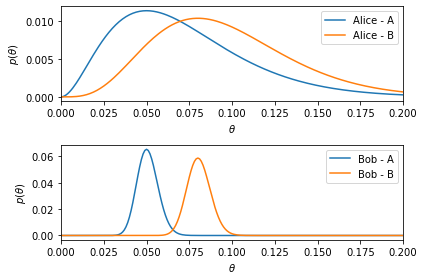

In [14]:
prior = 1 / len(thetas)
plt.subplot(2,1,1)
plt.plot(thetas, posterior(2,40, prior), label='Alice - A')
plt.plot(thetas, posterior(4,50, prior), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.subplot(2,1,2)
plt.plot(thetas, posterior(64, 1280, prior), label='Bob - A')
plt.plot(thetas, posterior(128,1600, prior), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.tight_layout()
plt.show()

#### beta

In [15]:
def betaf(alpha, beta):
    numerator = thetas ** (alpha-1) * (1-thetas) **(beta - 1)
    return numerator / numerator.sum()

def posterior(a, N):
    return betaf(a+1, N-a+1)

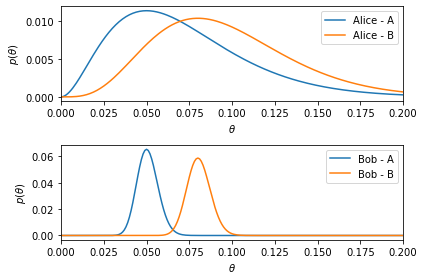

In [16]:
plt.subplot(2,1,1)
plt.plot(thetas, posterior(2,40), label='Alice - A')
plt.plot(thetas, posterior(4,50), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.subplot(2,1,2)
plt.plot(thetas, posterior(64, 1280), label='Bob - A')
plt.plot(thetas, posterior(128,1600), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.tight_layout()
plt.show()

### HDI

In [17]:
# 確率質量ランキング上位の値の列を返す
# highest mass values
def hmv(xs, ps, alpha=0.95):
    xps = sorted(zip(xs,ps), key=lambda xp: xp[1], reverse=True)
    xps = np.array(xps)
    xs = xps[:,0]
    ps = xps[:,1]
    return np.sort(xs[np.cumsum(ps) <= alpha])

In [18]:
thetas = np.linspace(0,1,1001)

def posterior(a,N):
    alpha = a+1
    beta = N-a+1
    numerator = thetas ** (alpha-1)*(1-thetas)**(beta-1)
    return numerator / numerator.sum()

ps = posterior(2,40)

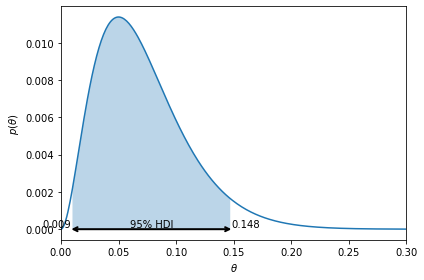

In [19]:
# アリスのデザインA案
hm_thetas = hmv(thetas, ps, alpha=0.95)
plt.plot(thetas, ps)
plt.annotate('', xy=(hm_thetas.min(), 0),
             xytext=(hm_thetas.max(), 0),
             arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                             arrowstyle='<->', linewidth=2))
plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
            ha='right', va='bottom')
plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
            ha='left', va='bottom')
plt.annotate('95% HDI', xy=(hm_thetas.mean(), 0),
            ha='center', va='bottom')
hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

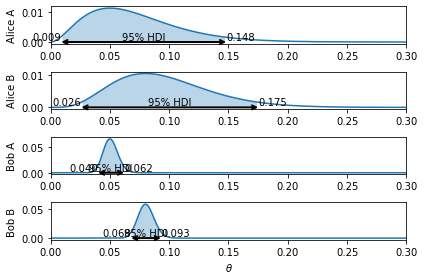

In [20]:
# 各デザイン案
def plot_hdi(ps, label):
    hm_thetas = hmv(thetas, ps, 0.95)
    plt.plot(thetas, ps)
    plt.annotate('', xy=(hm_thetas.min(), 0),
                 xytext=(hm_thetas.max(), 0),
                 arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                                 arrowstyle='<->', linewidth=2))
    plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
                ha='right', va='bottom')
    plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
                ha='left', va='bottom')
    plt.annotate('95% HDI', xy=(hm_thetas.mean(), 0),
                ha='center', va='bottom')
    hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
    plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
    plt.ylabel(label)
    plt.xlim(0, 0.3)

plt.subplot(4,1,1)
alice_a = posterior(2, 40)
plot_hdi(alice_a, 'Alice A')
plt.subplot(4,1,2)
alice_b = posterior(4, 50)
plot_hdi(alice_b, 'Alice B')
plt.subplot(4,1,3)
bob_a = posterior(64, 1280)
plot_hdi(bob_a, 'Bob A')
plt.subplot(4,1,4)
bob_b = posterior(128, 1600)
plot_hdi(bob_b, 'Bob B')
plt.xlabel(r'$\theta$')
plt.tight_layout()
plt.show()

## Chap. 2 probabilistic programming

In [21]:
import pymc3 as pm

In [22]:
N = 40 # アリスのデザインA案の表示数
a = 2  # アリスのデザイン案のクリック数

In [23]:
# 統計モデル作成
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    obs = pm.Binomial('a', p=theta, n=N, observed=a)
    trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 57 seconds.


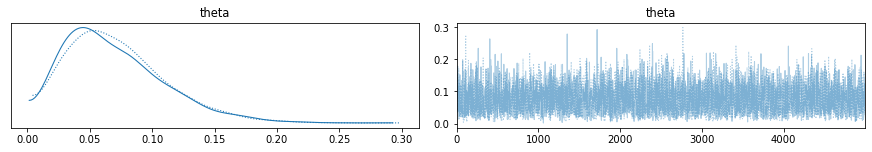

In [24]:
with model:
    pm.traceplot(trace)

In [25]:
with model:
    print(pm.summary(trace, hdi_prob=0.95))

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_mean  \
theta  0.071  0.039     0.009      0.147      0.001      0.0    5004.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
theta  5004.0    4201.0    4567.0    1.0  


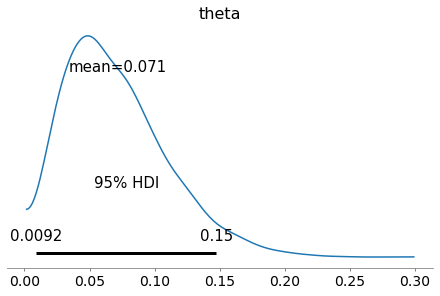

In [26]:
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)

In [27]:
# アリスのデザインA案のクリック率は1%以上か
print((trace['theta'] - 0.01 > 0).mean())

0.9941


In [28]:
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
    obs = pm.Binomial('obs', p=theta, n=[40,50], observed=[2,4])
    trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 53 seconds.


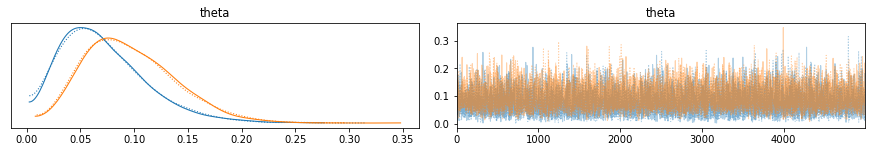

In [29]:
with model:
    pm.traceplot(trace, ['theta'], compact=True)

In [30]:
# アリスのデザイン案で違いはでるのか
print((trace['theta'][:,1] - trace['theta'][:,0]>0).mean())

0.6769


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 56 seconds.


0.9991


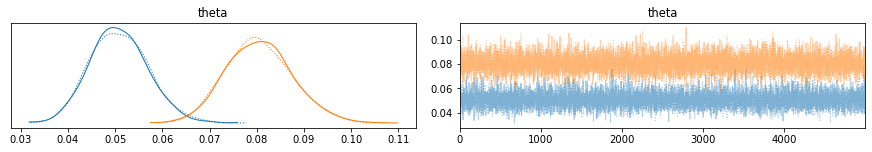

In [31]:
# Bob のデザイン案
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1, shape=2)
    obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
    trace = pm.sample(5000, chains=2)
    print((trace['theta'][:,1] - trace['theta'][:,0]>0).mean())
    pm.traceplot(trace, ['theta'], compact=True)

### カテゴリ分布の場合

In [32]:
n_a = [20,10,36,91,170]
data = []
for i in range(len(n_a)):
    data += [i for _ in range(n_a[i])]
with pm.Model() as model_a:
    theta = pm.Dirichlet('theta', a=np.array([1,1,1,1,1]))
    obs = pm.Categorical('obs', p=theta, observed=data)
    trace_a = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 71 seconds.


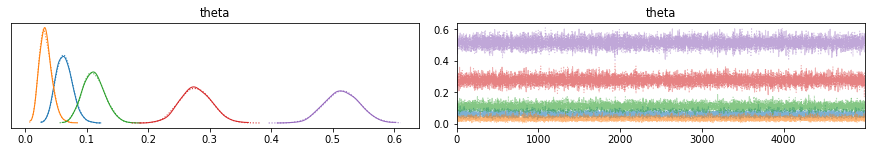

In [33]:
with model_a:
    pm.traceplot(trace_a)

In [ ]:
with model_a:
    pm.plot_posterior(trace_a, hdi_prob=0.95)

In [ ]:
# 多項分布の導入
n_b = np.array([0,0,4,0,6])
with pm.Model() as model_b:
    theta = pm.Dirichlet('theta', a=np.array([1,1,1,1,1]))
    obs = pm.Multinomial('obs', p=theta, n=n_b.sum(), observed=n_b)
    trace_b = pm.sample(5000, chains=2)
    pm.traceplot(trace_b)

### 滞在時間をテストする

In [ ]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

In [ ]:
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=3000)
    obs = pm.Exponential('obs', lam=1/theta, observed=data)
    trace = pm.sample(5000, chains=2)
    pm.traceplot(trace)

In [ ]:
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)

## Chap. 3 combinational test

In [ ]:
n = [434, 382, 394, 88]
clicks = [8,17, 10, 4]
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=len(n))
    obs = pm.Binomial('obs', p=theta, n=n, observed=clicks)
    trace = pm.sample(5000, chains=2)
    pm.traceplot(trace, compact=True)

In [ ]:
with model:
    print(pm.summary(trace, hdi_prob=0.95))

In [ ]:
with model:
    pm.forestplot(trace, combined=True, hdi_prob=0.95)

In [ ]:
# 線形モデルに変更
img = [0,0,1,1]
btn = [0,1,0,1]

with pm.Model() as model_comb:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    comb = alpha + beta[0] * img + beta[1] * btn
    theta = pm.Deterministic('theta', 1/(1+pm.math.exp(-comb)))
    obs = pm.Binomial('obs', p=theta, n=n, observed=clicks)
    trace_comb= pm.sample(5000, chains=2)

In [ ]:
with model_comb:
    pm.traceplot(trace_comb)

In [ ]:
with model_comb:
    pm.plot_posterior(trace_comb, var_names=['beta'], hdi_prob=0.95)

In [ ]:
with pm.Model():
    pm.forestplot([trace, trace_comb], var_names=['theta'],
                 hdi_prob=0.95, combined=True,
                 model_names=['Individual', 'Combined'])